# Ejercicio 4 de la Tarea 2

Un jugador dispara a un objetivo de $10$ cm de radio, que consiste en coronas concéntricas, delimitadas por círculos de radios $1,2,\dots,10$ cm y numeradas respectivamente de $10$ a $1$. La probabilidad de alcanzar la corona $k$ es proporcional al área de esta corona, y se supone que el jugador alcanza su objetivo en cada lanzamiento. Sea $X$ la variable aleatoria que en cada ejecución asocia el número del objetivo. ¿Cuál es la ley de probabilidad de $X$? El jugador gana $k$ pesos si alcanza la corona numerada $k$ para $k\in \{6,\dots, 10\}$, mientras que pierde $2$ pesos si alcanza una de las coronas periféricas numeradas del $1$ al $5$. ¿Es el juego favorable para el jugador?

![title](circles1.jpg)

## Propiedades de la *función de área*

Estamos ante un problema de probabilidad geométrica (pero no uniforme). ¿Qué propiedades debemos tener en cuenta relativos a la **función de área**?

La propiedad fundamental es la propiedad de *aditividad* de la **función de área**: Si $A$ es un conjunto de $\mathbb R^2$ con área finita (*medible*) y $A_1,A_2,...,A_n$  son subconjuntos de $\mathbb R^2$ con área (*medibles*) y ajenos dos a dos tales que 

$$
A=\bigcup_{i=1}^nA_i
$$

entonces

$$
\mathrm{Área}(A)=\sum_{i=1}^n\mathrm{Área}(A_i)
$$

![title](area_poligonal_1.jpg)

Esta propiedad es también válida si $n=\infty$.

Por supuesto, cualquier punto (dimensión $0$) y cualquier línea o curva (dimensión $1$) tienen área cero.

## Área de conjuntos "regulares"

Los problemas de probabilidad geométrica están relacionados con el muestreo aleatorio sobre un conjunto "regular" $A$ de $\mathbb R^2$ (o en $\mathbb R^n$, en general). Por "regular" queremos decir superficies poligonales o circulares y elípticas (o sectores de tales superficies). 

![title](Superficies_1.jpg)

Calcular áreas de las superficies anteriores es elemental y es una tarea relativamente sencilla (aunque puede ser tediosa)

Con mayor generalidad, podemos decir informalemente que una superficie de $\mathbb R^2$ es "regular" si está acotada por las gráficas de funciones (reales) *suaves*.  Una función es *suave* si es continua en un intervalo $[a,b]$ y (infinitamente) diferenciable en $(a,b)$

Por ejemplo:

Consideremos las funciones trigonométricas 

$$
\sin x \qquad \text{ y } \qquad \cos x
$$

en el intervalo $[0,2]$.

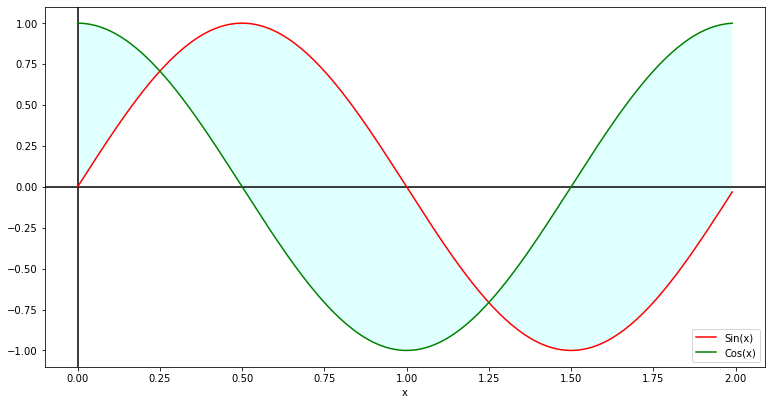

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(np.pi * x) # Función Seno en el intervalo [0,2]
y2 = np.cos(np.pi * x) # Función Coseno en el intervalo [0,2]

fig=plt.figure(figsize=[2,1])
ax=fig.add_axes([0,0,5,5])
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(x,y1,color='red',label='Sin(x)')
ax.plot(x,y2,color='green',label='Cos(x)')
ax.fill_between(x, y1, y2,facecolor='lightcyan')
ax.set_xlabel('x')
plt.legend()
plt.show()

El área de la superficie sombreada está determinada de la siguiente manera:

Sean $m,M:[0,2]\to[-1,1]$ dadas por

\begin{align}
m(x)&=\min(\sin x,\cos x)\\[0.5em]
M(x)&=\max(\sin x,\cos x)
\end{align}

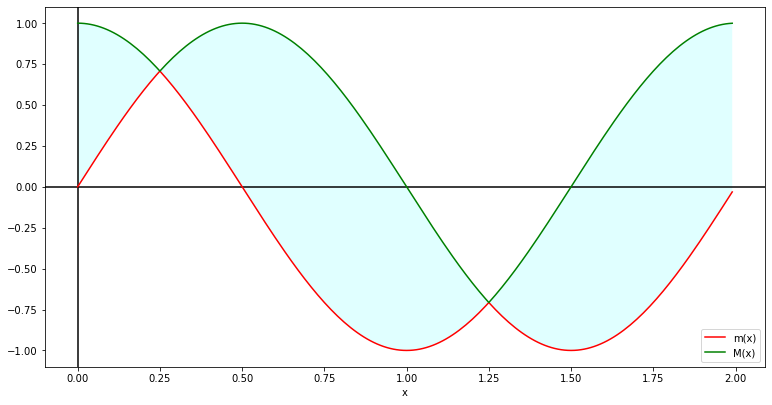

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(np.pi * x) # Función Seno en el intervalo [0,2]
y2 = np.cos(np.pi * x) # Función Coseno en el intervalo [0,2]

#m = np.min(np.sin(np.pi * x),np.cos(np.pi * x))
#M = np.max(np.sin(np.pi * x),np.cos(np.pi * x))

m = y1*(y1<=y2)+y2*(y1>y2)
M = y2*(y1<=y2)+y1*(y1>y2)

fig=plt.figure(figsize=[2,1])
ax=fig.add_axes([0,0,5,5])
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(x,m,color='red',label='m(x)')
ax.plot(x,M,color='green',label='M(x)')
ax.fill_between(x, m, M,facecolor='lightcyan')
ax.set_xlabel('x')
plt.legend()
plt.show()

La superficie sombreada $A$ es entonces el conjunto

$$
A=\{(x,y)\in\mathbb R^2:m(x)\le y\le M(x)\}
$$

El área de $A$ puede calcularse mediante Cálculo Integral:

$$
\mathrm{Área}(A)=\int_0^2\big[M(x)-m(x)\big]dx
$$

O equivalentemente:

$$
\mathrm{Área}(A)=\int_0^2|\sin x-\cos x|dx
$$

En este caso, aunque algo sofisticado, el concepto de "área", no deja de ser bastante comprensible a la intuición. 

Nos preguntamos sobre qué otro tipo de superficies de $\mathbb R^2$ podemos mantener una idea simple (o relativamente simple) en cuanto al cálculo de "área".

## Otras superficies no regulares (el copo de nieve de Koch)

In [36]:
from IPython.display import HTML
HTML('<img src="exQGrhNfax-koch.gif" width="450">')

El copo de nieve de Koch es el conjunto $A$ de $\mathbb R^2$ que está definido como la superficie "límite" en esta sucesión de polígonos

¿Cuál es el área del copo de nieve de Koch?

### Paso 0:

![title](Koch-snowflake-base-case_1.jpg)

Partimos de un triángulo equilatero $A_0$ cuyo lado es igual a 

$$
\ell_0=1.
$$  

Definimos $t_0$ como el número de triángulos en el Paso $0$:

$$
t_0:=1.
$$

Entonces el número de lados de $A_0$ es

$$
N_0:=3.
$$

Y el área $a_0$ de triángulo original $A_0$ es 

$$
a_0:=\mathrm{Área}(A_0)=\frac{\sqrt 3}2
$$

### Paso 1:

![title](Koch-snowflake-after-1-iteration-with-red_1.jpg)

La superficie $A_1$ es resultado de agregar sobre cada uno de los lados de $A_0$, un triángulo equilátero cuyo lado es 

$$
\ell_1:=1/3
$$ 

Esto es una tercera parte del lado del triángulo equilátero original $A_0$. 

En total se agregan  

$$
t_1:=N_0=3
$$  

triángulos equiláteros de lado  $1/3$

Cada lado del triángulo original $A_0$ se múltiplica por $4$,  y por lo tanto  el númeo de lados de $A_1$ es 

$$
N_1:=4N_0=4\cdot 3.
$$

Y por otra parte, la superficie de cada uno de estos $3$ nuevos triángulos es $1/9$ parte del triángulo $A_0$:

![title](un_noveno_1.jpg)

![title](un_noveno.jpg)

Por lo tanto, el área de cada uno de estos 3 triángulos está dada por

$$
a_1:=\frac 1 9 a_0
$$

El área de $A_1$ está entonces dada por

\begin{align}
\text{Área}(A_1)&=\mathrm{Área}(A_0)+t_1a_1\\[0.5em]
&=a_0+3\left(\frac19a_0\right)\\[0.5em]
&=a_0+\frac34\left(\frac49\right)a_0
\end{align}

### Paso 2

![title](Koch-snowflake-after-2-iterations-with-red-295x300.png)

La superficie del polígono $A_2$ es resultado de agregar sobre cada uno de los lados de $A_1$, un triángulo equilátero cuyo lado $\ell_2$ es $1/3$ del lado de cada uno de los triángulos agregados en la itreración $1$. Esto es:

$$
\ell_2:=\frac 1 3 \ell_1=\frac1{3^2}
$$

En total se agregan

$$
t_2:=N_1=4\cdot 3
$$

triángulos equiláteros de la lado $\ell_2$.

Nuevamente, cada lado del polígono $A_1$ se multiplica por $4$, por lo que el número de lados de $A_2$ es

$$
N_2=4N_1=4(4\cdot3)=4^2\cdot 3
$$

El área de cada nuevo triángulo agregado es $1/9$
del área de cada triángulo agregado en la iteración anterior, por lo que el área de cada triángulo agregado en la iteración 2 es:

$$
a_2:=\frac 1 9 a_1=\frac19\left(\frac19a_0\right)=\frac1{9^2}a_0
$$

El área de $A_2$ es:

\begin{align}
\mathrm{Área}(A_2):&=\mathrm{Área}(A_1)+t_2a_2\\[0.5em]
&=a_0+\frac34\left(\frac49\right)a_0+4\cdot 3\left(\frac1{9^2}\right)a_0\\[0.5em]
&=a_0+\frac34\left(\frac49\right)a_0+\frac34\left(\frac{4^2}{9^2}\right)a_0\\[0.5em]
&=a_0+\frac34\left(\frac49+\frac{4^2}{9^2}\right)a_0
\end{align}

### Paso $n$


El área del polígono $A_n$ del paso $n$ de la construcción del copo de nieve de Koch es:

$$
\mathrm{Área}(A_n)=a_0+\frac34\left(\sum_{k=1}^n\frac{4^k}{9^k}\right)a_0.
$$

Ahora,

$$
\sum_{k=1}^n\frac{4^k}{9^k}=\frac49\cdot\frac{1-\frac{4^n}{9^n}}{1-\frac49}=\frac49\cdot\frac{1-\frac{4^n}{9^n}}{\frac59}=\frac45\left(1-\frac{4^n}{9^n}\right)
$$

Por lo tanto:

$$
\mathrm{Área}(A_n)=a_0+\frac34\cdot\frac45\left(1-\frac{4^n}{9^n}\right)a_0=\left(\frac85-\frac35\cdot\frac{4^n}{9^n}\right)a_0
$$

### Área del copo de nieve de Koch

$$
\mathrm{Área}(A):=\lim_{n\to\infty}\mathrm{Área}(A_n)=\lim_{n\to\infty}\left(\frac85-\frac35\cdot\frac{4^n}{9^n}\right)a_0=\frac85a_0.
$$

## $\sigma$-álgebra de Borel como clase de eventos

Nos preguntamos si todo subconjunto de $\mathbb R^2$ tiene "área"

La respuesta es negativa. Por lo tanto, cuando estamos ante problemas de probabilidad geométrica debemos ser muy cuidadosos en determinar el $\sigma$-álgebra de eventos.

La pregunta inmediata es entonces cuáles subconjuntos de $\mathbb R^2$ sí tienen área. 

El $\sigma$-álgebra de Borel en $\mathbb R^2$, denotada por $\mathcal B(\mathbb R^2)$, es la clase más pequeña que reúne subconjuntos de $\mathbb R^2$ a los cuales se les puede asignar un "área".




Por lo general, elegimos la $\sigma$-álgebra de Borel, o partes de ésta, como la clase de eventos para problemas geométricos. Es lo suficientemente robusta para los fines de la Teoría de la Probabilidad, aunque no es la más grande clase de subconjuntos de $\mathbb R^2$ a los que se les puede asignar algo parecido a un "área".

# Solución del Ejercicio

Sea  $\Omega$  la superficie de radio $10$ que conforma toda la superficie de la diana sobre la que tira el jugador. Es decir,

$$
\Omega=\{(x,y)\in\mathbb R^2:x^2+y^2\le10^2\}.
$$

Entonces

$$
\mathbb P(\Omega)=1.
$$

Pero 

$$
\mathrm{Área}(\Omega)=10^2\pi.
$$

Denotamos como  $C(k)$  la superficie de la  $k$-ésima corona, para toda $k=1,2,3,4,5,6,7,8,9,10$.

$$
C(k)=\{(x,y)\in\Omega:(10-k)^2\le x^2+y^2<(10-k+1)^2\}
$$

Tenemos,

\begin{align}
\mathrm{Área}(C(k))&=\pi (10-k+1)^2-\pi(10-k)^2\\[0.5em]
&=\pi\big[(10-k+1)^2-(10-k)^2\big]\\[0.5em]
&=\pi(10-k+1-10+k)(10-k+1+10-k)\\[0.5em]
&=(21-2k)\pi
\end{align}

Por hipótesis del problema.

$$
\mathbb P(C(k))=\alpha\cdot\mathrm{Área}(C(k))=\alpha(21-2k)\pi.
$$

donde $\alpha>0$ es una constante de proporcionalidad por encontrar.

Ahora, es claro que

$$
\Omega=\bigcup_{k=1}^{10}C(k).
$$

Entonces

\begin{align}
1=\mathbb P(\Omega)&=\sum_{k=1}^{10}\mathbb P(C(k))\\
&=\sum_{k=1}^{10}\alpha\cdot\mathrm{Área}(C(k))\\
&=\alpha\sum_{k=1}^{10}\mathrm{Área}(C(k))\\
&=\alpha\cdot\mathrm{Área}(\Omega)
\end{align}

De donde,

$$
\alpha=\frac1{\mathrm{Área}(\Omega)}=\frac1{10^2\pi}.
$$

Por lo tanto

$$
\mathbb P(C(k))=\frac{21-2k}{10^2}.
$$

Observamos que $\mathrm{Rango}(X)=\{1,2,3,4,5,6,7,8,9,10\}$ y  

$$
(X=k)=C(k)
$$

Así que la ley de $X$ está dada por

$$
\mathbb P(X=k)=\mathbb P(C(k))=\frac{21-2k}{10^2}, \qquad k=1,2,3,4,5,6,7,8,9,10.
$$

Sea $Y$ la variable aleatoria que denota la ganancia del jugador.

El rango de $Y$ es el conjunto $\{-2,6,7,8,9,10\}$.

Y además

$$
Y=-2 \qquad \Leftrightarrow \qquad X=1,2,3,4,5
$$


Por lo tanto:
    
\begin{align}
\mathbb P(Y=-2)&=\mathbb P((X=1)\cup(X=2)\cup(X=3)\cup(X=4)\cup(X=5))\\[0.5em]
&=\mathbb P(X=1)+\mathbb P(X=2)+\mathbb P(X=3)+\mathbb P(X=1)+\mathbb P(X=5)\\[0.5em]
&=\sum_{k=1}^5\frac{21-2k}{10^2}\\[0.5em]
&=\frac1{10^2}\left(21\cdot 5-2\sum_{k=1}^5k\right)\\[0.5em]
&=\frac1{10^2}\left(21\cdot 5-2\cdot 15\right)\\[0.5em]
&=\frac{75}{100}\\[0.5em]
&=\frac34.
\end{align}

Y para $k=6,7,8,9,10,$

$$
Y=k \qquad \Leftrightarrow \qquad X=k.
$$

Por lo tanto:

$$
\mathbb P(Y=k)=\mathbb P(X=k)=\mathbb P(C(k))=\frac{21-2k}{10^2}, \qquad k=6,7,8,9,10.
$$

La esperanza de $Y$ está dada por:

\begin{align}
\mathbb E(Y)&=(-2)\mathbb P(Y=-2)+\sum_{k=6}^{10}k\,\mathbb P(Y=k)\\[0.5em]
&=(-2)\frac34+\sum_{k=6}^{10}k\frac{21-2k}{10^2}\\[0.5em]
&=-\frac32+\frac1{10^2}\left(21\sum_{k=6}^{10}k-2\sum_{k=6}^{10}k^2\right)\\[0.5em]
&=-\frac32+\frac1{10^2}\left(21\cdot40-2\cdot330\right)\\[0.5em]
&=-\frac32+\frac{180}{100}\\[0.5em]
&=-\frac32+\frac95\\[0.5em]
&=\frac3{10}
\end{align}